# OFAC vs Non-OFAC Transactions

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
master_df = '/Volumes/Seagate/misc/master.csv.gz'
df = pd.read_csv(master_df, compression='gzip', sep='\t')

In [3]:
# Clean up the data
# Finalized transactions only
df = df[(df['status'] == 'confirmed') | (df['status'] == 'failed')]
df = df[df['timepending'] > 0]
df = df.drop_duplicates(subset=['hash'], keep='first')

# drop rows where blockspending > 20 bc they are outliers and make the plots hard to read
df = df[df['blockspending'] < 20]

In [4]:
# read in the list of ofac addresses from OFAC.csv
ofac_list = pd.read_csv('OFAC.csv', sep=',')

In [9]:
# create a new column in df that is true if the toaddress or fromaddress is in the ofac list and false otherwise
df['ofac'] = np.where((df['toaddress'].isin(ofac_list['address'])) | (df['fromaddress'].isin(ofac_list['address'])), True, False)


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_41116/688787674.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['ofac'] == True]['blockspending'], label='OFAC')
/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_41116/688787674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

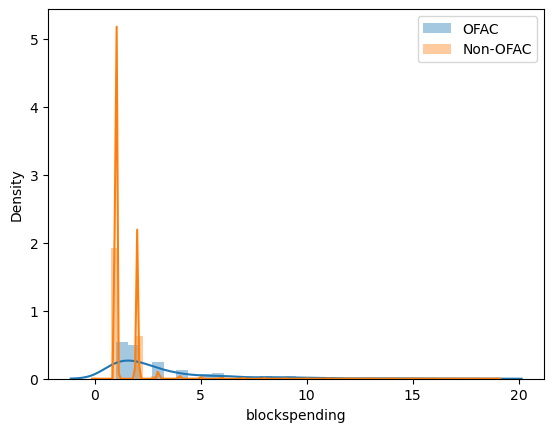

In [44]:
# plot the distribution of the df['blockspending'] for the ofac and non-ofac transactions
sns.distplot(df[df['ofac'] == True]['blockspending'], label='OFAC')
sns.distplot(df[df['ofac'] == False]['blockspending'], label='Non-OFAC')
plt.legend()
plt.show()
plt.close()

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_41116/753916316.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['ofac'] == True]['blockspending'], label='OFAC')


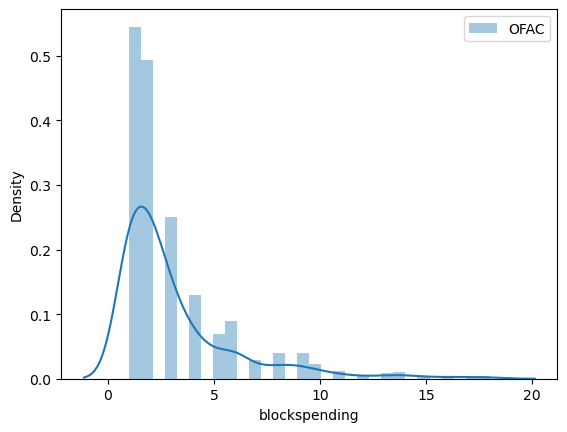

In [14]:
# plot the distribution of the df['blockspending'] for the ofac and non-ofac transactions
sns.distplot(df[df['ofac'] == True]['blockspending'], label='OFAC')
# sns.distplot(df[df['ofac'] == False]['blockspending'], label='Non-OFAC')
plt.legend()
plt.show()
plt.close()

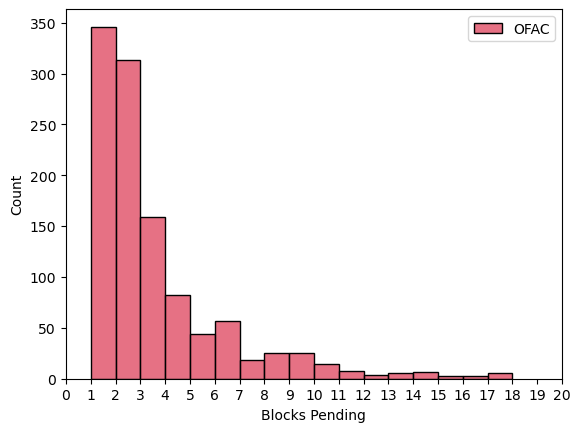

In [39]:
sns.histplot(df[df['ofac'] == True]['blockspending'], kde=False, label='OFAC',binwidth=1,edgecolor="black", color="#de425b")
plt.legend()
plt.xlabel('Blocks Pending')
plt.ylabel('Count')  # Change "Frequency" to "Count"
plt.xticks(range(21))  # Set x-ticks to show whole numbers
plt.xlim([0, 20])  # Set the limits of the x-axis
plt.show()
plt.close()

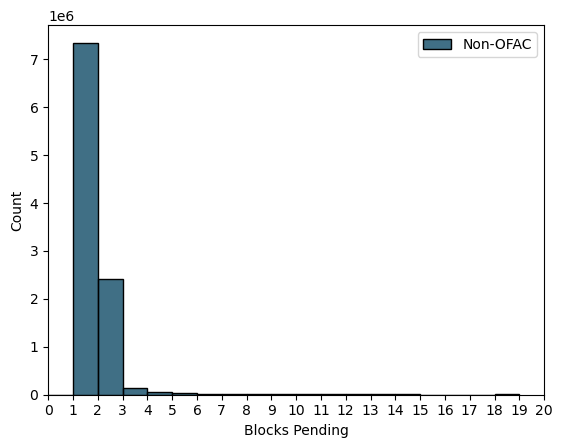

In [40]:
sns.histplot(df[df['ofac'] == False]['blockspending'], kde=False, label='Non-OFAC', binwidth=1, edgecolor="black", color="#003f5c")
plt.legend()
plt.xlabel('Blocks Pending')
plt.ylabel('Count')  # Change "Frequency" to "Count"
plt.xticks(range(21))  # Set x-ticks to show whole numbers
plt.xlim([0, 20])  # Set the limits of the x-axis
plt.show()
plt.close()

In [42]:
print("Number of OFAC transactions: ", len(df[df['ofac'] == True]))
print("Number of non-OFAC transactions: ", len(df[df['ofac'] == False]))

Number of OFAC transactions:  1120
Number of non-OFAC transactions:  10075568


# Compare the tip

In [58]:
# create a new column for actual tip
# actual tip = min(maxpriorityfee, (maxfeefergas - basefeepergas))
df.loc[:, 'mfpglessbfpg'] = df['maxfeepergas'] - df['basefeepergas']
df.loc[:, 'actualtip'] = df[['maxpriorityfeepergas', 'mfpglessbfpg']].min(axis=1)
df['weighted_value'] = df['actualtip'] * df['blockspending']

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_41116/1712501061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weighted_value'] = df['actualtip'] * df['blockspending']


In [47]:
df

,detecttime,hash,status,curblocknumber,blockspending,timepending,gas,gasprice,toaddress,fromaddress,maxpriorityfeepergas,maxfeepergas,basefeepergas,gasused,ofac,mfpglessbfpg,actualtip
26,2023-08-25T00:00:00.279Z,0xd4a29a39f09a413bdda345f5fa0235230ce2fa2a4b92...,confirmed,17987994,2.0,14014.0,235369.0,NaN,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0xdfc119838b92bb52b03f71117571ef25998f1b5b,1.000000e+08,1.935291e+10,1.367546e+10,168443.0,False,5.677444e+09,1.000000e+08
27,2023-08-25T00:00:00.279Z,0x09e7014c3fa9d399ed8a803aca718a13238e3e3d707a...,confirmed,17987994,2.0,12635.0,21000.0,NaN,0x22670532750c6e3e9141b2e31647e14fcfaa5e45,0x183a6cf1fc6504138d92c9d663094ee774f80038,2.000000e+09,2.930886e+10,1.367546e+10,21000.0,False,1.563339e+10,2.000000e+09
28,2023-08-25T00:00:00.279Z,0x1f7ba4907da8ecce539ca5ee449954d0b48b58491f96...,confirmed,17987994,1.0,4662.0,149236.0,NaN,0x32400084c286cf3e17e7b677ea9583e60a000324,0xce17b71b9f98e6c0f20d175644b2d7b8d998d691,1.500000e+09,2.269917e+10,1.367546e+10,118112.0,False,9.023706e+09,1.500000e+09
29,2023-08-25T00:00:00.279Z,0xf330b4d5c6c04183bde0b511abafab7d5d041c11bc80...,confirmed,17987994,2.0,11445.0,55952.0,NaN,0x98530e980cc6516e4c4dae1d6174dc46f02b04c7,0x791687225ec96e24251e2fee038e4bc21a0bca75,3.000000e+09,2.348164e+10,1.367546e+10,46626.0,False,9.806180e+09,3.000000e+09
31,2023-08-25T00:00:00.279Z,0xdba8e3768d271200f9f58e226eddde9bfe91ade05035...,confirmed,17987994,1.0,11611.0,55916.0,NaN,0x471a202f69d6e975da55e363dab1bdb2e86e0c0f,0x00fb6a3165947f8d5d91a66e4c02cef004f867c5,3.000000e+09,2.348164e+10,1.367546e+10,46596.0,False,9.806180e+09,3.000000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36315446,2023-09-07T23:59:59.986Z,0xc4f15107a4e781b53a53ab6a7e20a3d79a96fb9b1256...,confirmed,18087986,1.0,8148.0,21000.0,NaN,0xe4edb277e41dc89ab076a1f049f4a3efa700bce8,0x33a2b33534aa25de9d1ca97798f10a267ef83ef8,1.000000e+08,1.821996e+10,1.287302e+10,21000.0,False,5.346939e+09,1.000000e+08
36315447,2023-09-07T23:59:59.986Z,0xbabff6b7997414ad10f442e038fbc38135f02726bda0...,confirmed,18087986,1.0,7123.0,292282.0,NaN,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x4a880381b1565151367e797f706ddb8208c4125e,1.500000e+09,2.719735e+10,1.287302e+10,232076.0,False,1.432433e+10,1.500000e+09
36315448,2023-09-07T23:59:59.986Z,0xc6d154001b8fdae504ab8a202ebe56d14893f7e6d2c4...,confirmed,18087986,2.0,12936.0,11000000.0,NaN,0xfd14567eaf9ba941cb8c8a94eec14831ca7fd1b4,0x16d5783a96ab20c9157d7933ac236646b29589a4,1.000000e+09,1.500000e+11,1.287302e+10,50518.0,False,1.371270e+11,1.000000e+09
36315449,2023-09-07T23:59:59.986Z,0x17c06314bea805817df0f28898a3746eae81a06e9916...,confirmed,18087986,1.0,7699.0,61619.0,NaN,0xd533a949740bb3306d119cc777fa900ba034cd52,0xf16e9b0d03470827a95cdfd0cb8a8a3b46969b91,1.963945e+09,3.000000e+10,1.287302e+10,51325.0,False,1.712698e+10,1.963945e+09


## actual tip paid

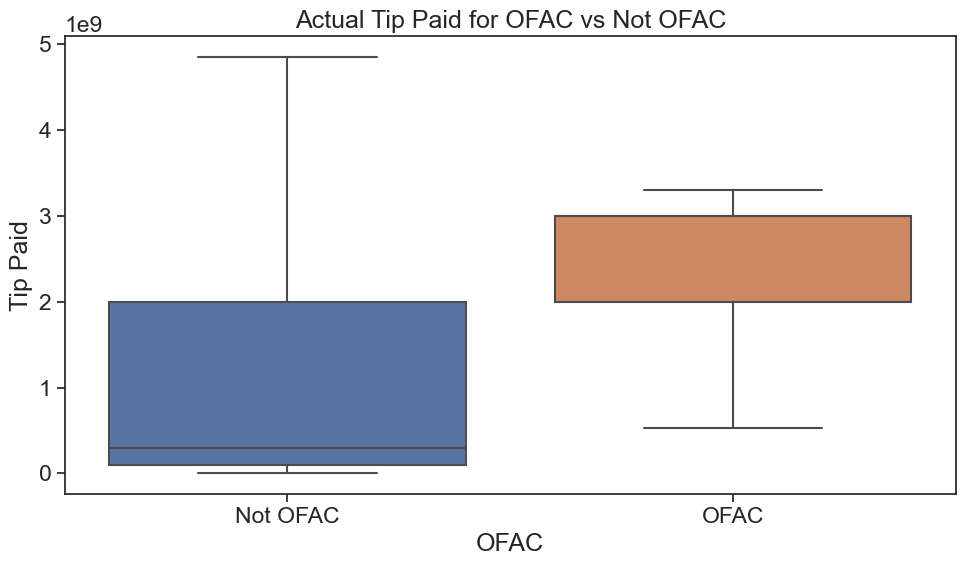

In [52]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='actualtip', data=df, showfliers=False)

# ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Tip Paid')
ax.set_title('Actual Tip Paid for OFAC vs Not OFAC')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
# plt.savefig('actual_tip_compare.png', dpi=300)
plt.close()


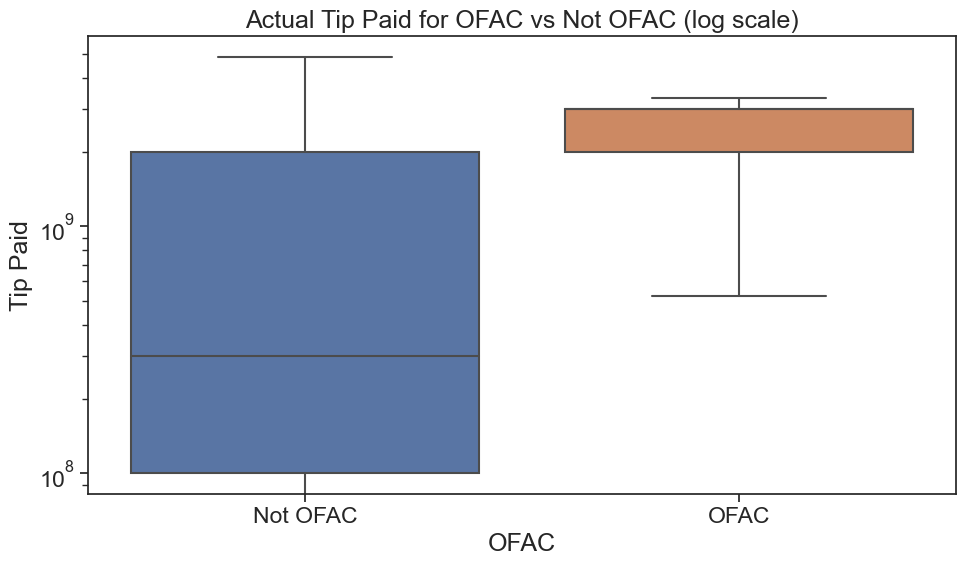

In [54]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='actualtip', data=df, showfliers=False)

ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Tip Paid')
ax.set_title('Actual Tip Paid for OFAC vs Not OFAC (log scale)')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
# plt.savefig('actual_tip_compare_log.png', dpi=300)
plt.close()

## by maxpriorityfeepergas (tip offered)

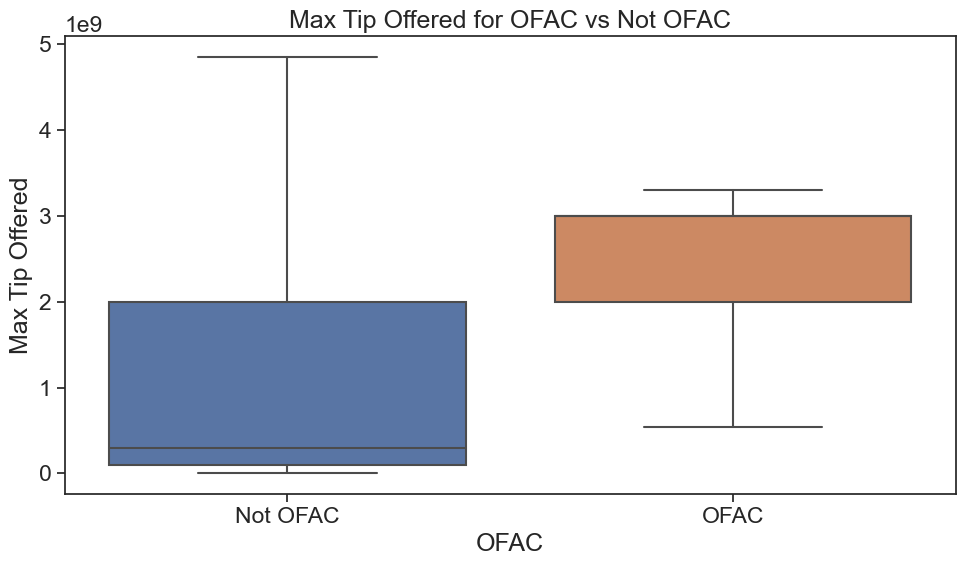

In [53]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='maxpriorityfeepergas', data=df, showfliers=False)

# ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Max Tip Offered')
ax.set_title('Max Tip Offered for OFAC vs Not OFAC')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
# plt.savefig('offered_tip_compare.png', dpi=300)
plt.close()


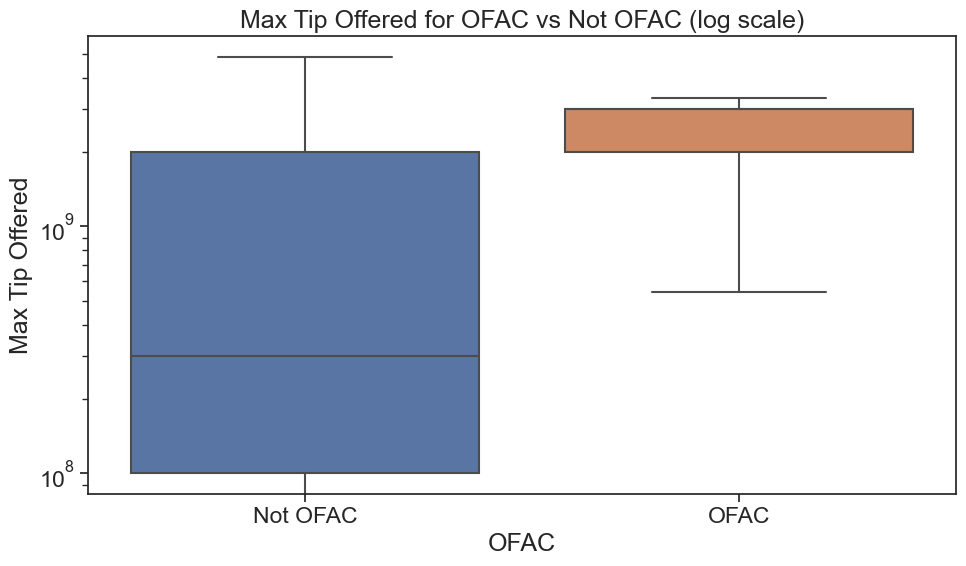

In [55]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='maxpriorityfeepergas', data=df, showfliers=False)

ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Max Tip Offered')
ax.set_title('Max Tip Offered for OFAC vs Not OFAC (log scale)')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
# plt.savefig('offered_tip_compare_log.png', dpi=300)
plt.close()


## weighted tip*pending time df['actualtip'] * df['blockspending']

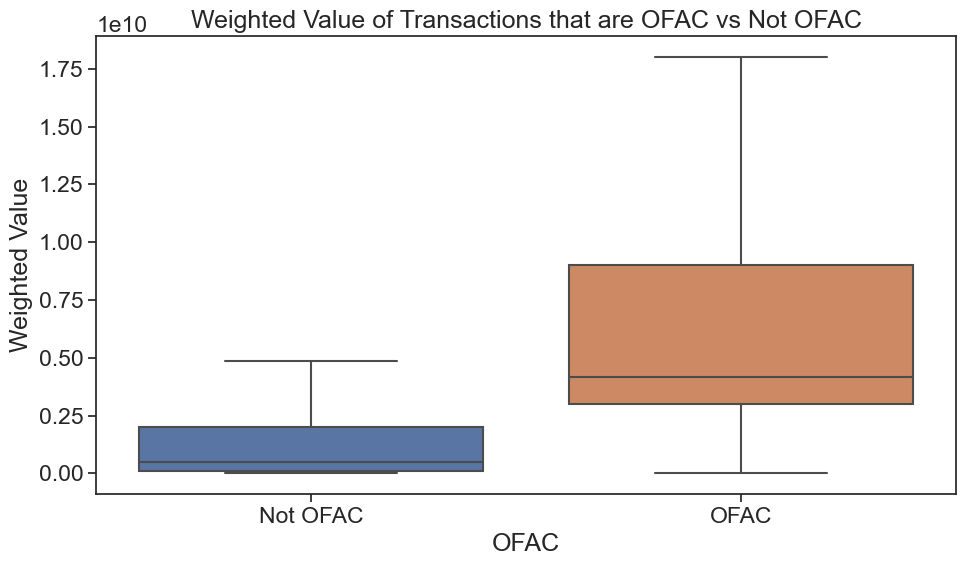

In [61]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='weighted_value', data=df, showfliers=False)

# ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Weighted Value')
ax.set_title('Weighted Value of Transactions that are OFAC vs Not OFAC')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
# plt.savefig('weighted_value_ofac.png', dpi=300)
plt.close()

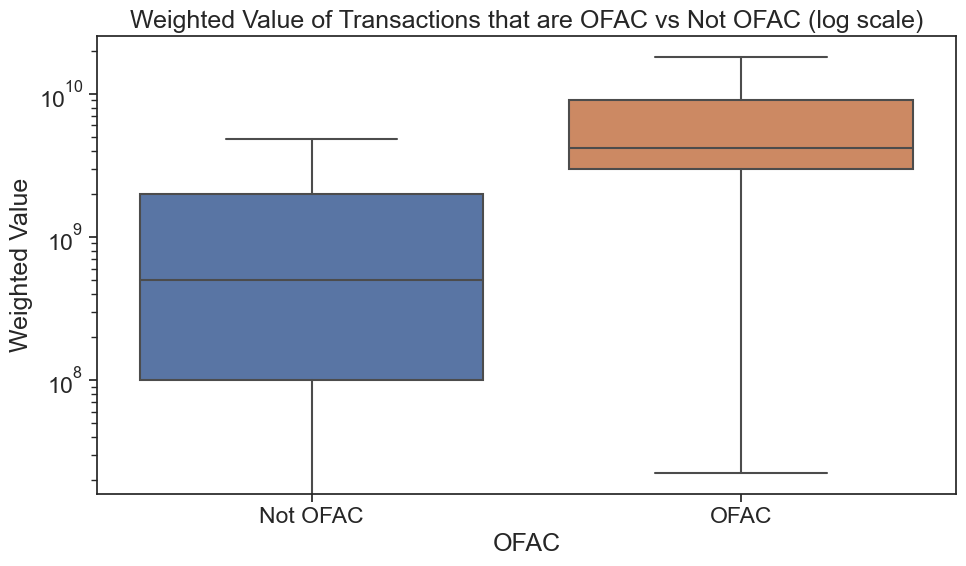

In [62]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='weighted_value', data=df, showfliers=False)

ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Weighted Value')
ax.set_title('Weighted Value of Transactions that are OFAC vs Not OFAC (log scale)')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
# plt.savefig('weighted_value_ofac_log.png', dpi=300)
plt.close()


## Blocks pending compare

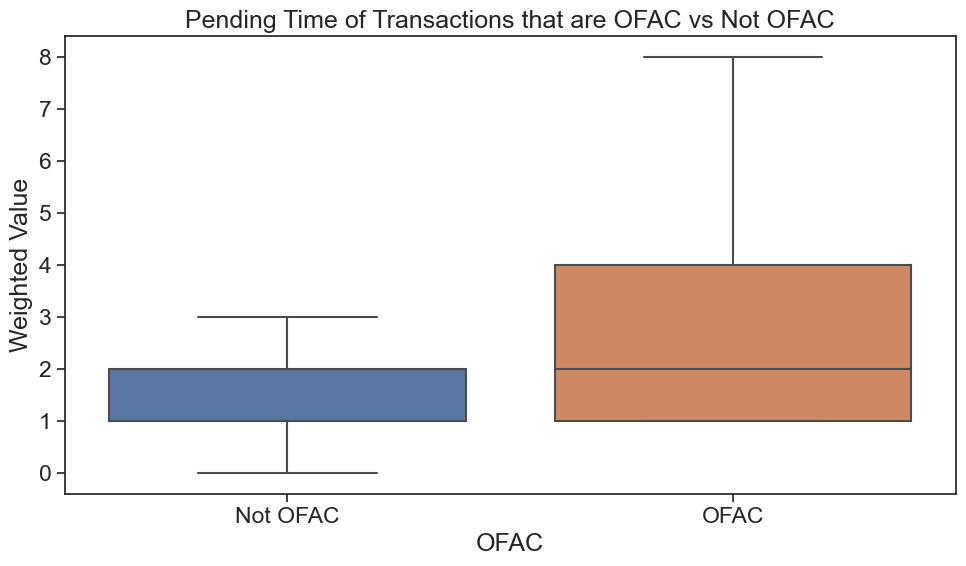

In [64]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='blockspending', data=df, showfliers=False)

# ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Weighted Value')
ax.set_title('Pending Time of Transactions that are OFAC vs Not OFAC')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
plt.close()
# plt.savefig('pendtime_ofac.png', dpi=300)


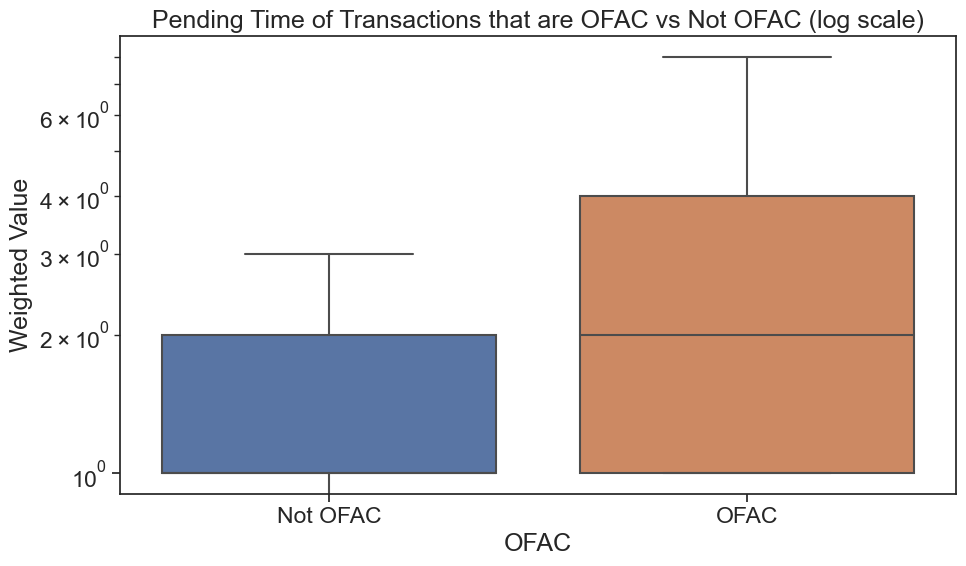

In [63]:
# plot the weighted value of transactions that are ofac vs not ofac
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='ofac', y='blockspending', data=df, showfliers=False)

ax.set_yscale('log')
ax.set_xlabel('OFAC')
ax.set_ylabel('Weighted Value')
ax.set_title('Pending Time of Transactions that are OFAC vs Not OFAC (log scale)')

ax.set_xticklabels(['Not OFAC', 'OFAC'])
plt.tight_layout()
plt.close()
# plt.savefig('pendtime_log_ofac.png', dpi=300)
